<a href="https://colab.research.google.com/github/john94501/aoa-python/blob/main/Section_04b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Academy of Alameda - Python 4b

## Adventure Game

Many of you are probably familiar with online games, such as Minecraft, Fortnite and others. These are referred to as MMOGs, or *Massive Multiplayer Online Games*. Long before we had the capability to play high quality graphical games like those online, programmers created text based multi-player games.

Many of those we built on the popular Dungeons and Dragons game. In the mid 1970s, a programmer by the name of Will Crowther developed *Adventure*. Quoting directly from the [Wikipedia entry](https://en.wikipedia.org/wiki/Colossal_Cave_Adventure) for it:

> In the game, the player explores a cave system rumored to be filled with treasure and gold. The game is composed of dozens of locations, and the player moves between these locations and interacts with objects in them by typing one- or two-word commands which are interpreted by the game's natural language input system. The program acts as a narrator, describing the player's location and the results of the player's attempted actions. It is the first well-known example of interactive fiction, as well as the first well-known adventure game, for which it was also the namesake.

![Adventure Screen](https://raw.githubusercontent.com/Neko250/adventure/master/img/adventure.jpg)

Inside of Colab, we cannot build multi-player games, but we can build an adventure game that will show you how such a game could be written, and run on a public (or private) server if you had one.

Indeed, the source code for the original Adventure game was recently re-discovered and has been uploaded to [GitHub](https://github.com/wh0am1-dev/adventure) where everybody can see it - it is not written in Python, but in a language that was popular with the scientific and engineering comunities at that time: FORTRAN. Coincidentally, FORTRAN was one of the languages I first used outside of school, though not one I would choose today!


## Getting Started

The essence of an adventure game is the map. The size of the map, and the number of types of items it can describe, will define how long the game can be played.

We are going to use a small map for the game here to make it simpler for us to set up inside of Colab, but in a real game the map would be many, many times larger. We are also constraining our map to a single level, but it is quite possible to have a three dimensional map, and indeed to even have multiple maps with mechanisms for jumping between them in more complex games.

In Python, we can represent the map as a two-dimensional list.

### Coordinates

We need to define a coordinate system for the world we are creating. For our simple two-dimensional world, it will be just `(X, Y)` so we will create a two dimensional map usinf Python lists.

We're going to use 24 x 24 in size, or 576 unique locations, mainly so we can sketch it easily on paper. 

First though, we should work out the kind of content we want, and for that we need to come up with a theme for the game. At the very least, we need to have something to mark the perimeter of the map so our player cannot fall off the world!

We could have an exit from the game in the perimeter wall and add code to handle the special case of the player walking through that exit and completing the game. Or, we can have the completion goal be something else in the map - the choice is all yours!

**Challenge Question**: Rather than having a perimeter wall, is there another way we could prevent the player falling off the world?

At this point, we should probably get out a piece of paper and a pencil and sketch our map on it so we can see what the world looks like. 


The example I'm going to build here is going to be set in a forest, with a hidden temple in the middle of it. We will define:

* Walls: Perimeter Wall, Temple Wall, Temple Door, Exit Gateway
* Hazards: Snake Pit, Deep Pit
* Items: Temple Key, Exit Key, Torch, Sword
* Animals: Bears

We will also define a path the player can follow. All other spaces will be dense, impenetrable forest (i.e. spaces the player cannot enter)

My map looks like this:

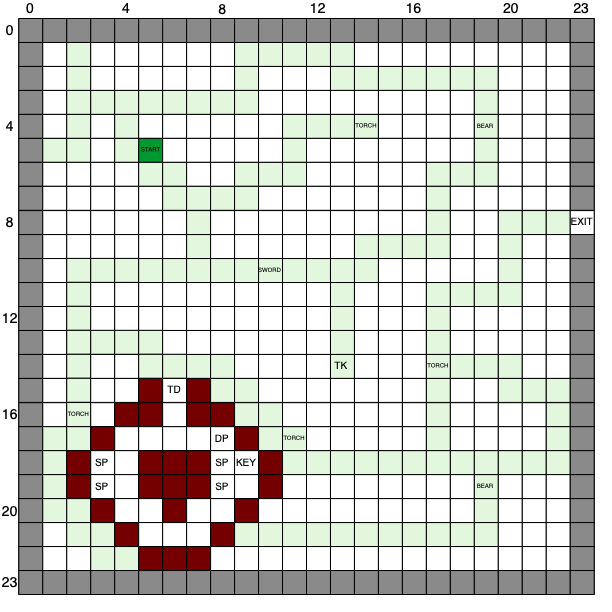

On the map, the grey are perimeter walls, the dark red is temple walls, The light green marks the pathways and the items are marked as follows:

* `START` = player starting position
* `EXIT` = the exit gateway (needs the `KEY` to unlock
* `TD` = temple door (needs the temple key, `TK`, to unlock)
* `BEAR` = starting position for the bears
* `TORCH` = locations where torches can be found
* `SP` = snake pit (falling in here kills the player; throwing a torch in kills the snakes)
* `DP` = deep pit (falling in here kills the player)
* `SWORD` = location where a sword can be found

The sword can be used to fend off the bears.

The bears will move around, along the paths, but cannot come off the paths. The empty spaces, outside of the temple at least, will be forest and impenetrable.


## Map Location Representation

Each location on the map can contain:

* A physical property (wall, path, forest, etc)
* At most one item
* A bear

Since this is a single player game, we do not need to keep track of players on the map. Instead, we will keep the coordinates where the player is separately.

In each location we will keep a three item list denoting what the square holds:

`[ Physical, Item, Animal ]`

For example, a square where a torch can be found would look like this if there is no bear present:

`[ "path", "torch", None ]`

Or like this if there is a bear in the same square:

`[ "path", "torch", "bear" ]`

A perimeter wall would look like this, since it can never hold items or animals:

`[ "perimeter", None, None ]`

We are using the Python `None` value to represent nothing in this case, but we could use an empty string instead if that is useful.

We're going to turn our sketch map into a text file that represents a map

Let's set up the map now. Modify this code to suit your own map and game theme.



In [4]:
text_map="""\
PPPPPPPPPPPPPPPPPPPPPPPP
P +      +++++         P
P +      +   +++++++   P
P ++++++++         +   P
P + +      +++T    B   P
P++ +S     +       +   P
P    ++  +++     +++   P
P     ++++       +     P
P      +         +  +++E
P      +      ++++  +  P
P ++++++++X++++     +  P
P +          +   ++++  P
P +          +   +     P
P ++++       +   +     P
P +  ++++    1   T+++  P
P +  WDW++       +  +++P
P T WW+WW++      +    +P
P++W++++ZW+T     +    +P
P+WN+WWWN2W++++++++++++P
P+WN+WWWN+W        B   P
P++W++W++W         +   P
P ++W+++W+++++++++++   P
P  ++WWW               P
PPPPPPPPPPPPPPPPPPPPPPPP"""

My map coding is as follows:

```
P = [ "perimeter", None, None ]
+ = [ "path", None, None ]
S = [ "path", None, None ]         (but also the starting point for the player)
T = [ "path", "torch", None ]
X = [ "path", "sword", None ]
D = [ "door", None, None ]
W = [ "wall", None, None ]
1 = [ "path", "temple_key", None ]
2 = [ "path", "exit_key", None ]
N = [ "snake", None, None ]
Z = [ "deep", None, None ]
B = [ "path", None, "bear" ]
SPACE = [ "forest", None, None ]
```

We will write some code to convert that string formatting of the map into the actual map we need for the gameplay. You should come up with something similar for your map.

The block below has a new function in it, `split()`, which is used to split a string into a list of strings. By default, it splits the string on spaces (which is handy if you need to split up words in a sentence, for example), but we want to change that to split our text map into lines based on the newline character. The newline character is represented by `\n` in many programming languages, including Python.


In [5]:
# We will have these as globals since we need them a lot. A global is something
# we can access from anywhere in the program. By convention, we name globals
# all in upper case, or at least starting with an upper case letter.

MAP = []
PLAYER = None
BEARS = []

def setup_map():
  global MAP, PLAYER, BEARS

  lines = text_map.split("\n")
  for row in range(len(lines)):
    line = lines[row]
    map_row = []
    for col in range(len(line)):
      c = line[col]
      match c:
        case "P":
          map_row.append([ "perimeter", None, None ])
        case "+":
          map_row.append([ "path", None, None ])
        case "S":
          map_row.append([ "path", None, None ])
          PLAYER = ( row, col )
        case "T":
          map_row.append([ "path", "torch", None ])
        case "X":
          map_row.append([ "path", "sword", None ])
        case "D":
          map_row.append([ "door", None, None ])
        case "W":
          map_row.append([ "wall", None, None ])
        case "1":
          map_row.append([ "path", "temple_key", None ])
        case "2":
          map_row.append([ "path", "exit_key", None ])
        case "N":
          map_row.append([ "snake", None, None ])
        case "Z":
          map_row.append([ "deep", None, None ])
        case "B":
          map_row.append([ "path", None, "bear" ])
          BEARS.append([row, col])
        case _:
          map_row.append([ "forest", None, None ])
    MAP.append(map_row)


In [6]:
# We can test our function here, but we will use it later when putting the
# whole game together
setup_map()

# Use this to print out the map as we have it now
for row in range(len(MAP)):
  print(MAP[row])

# Also print the player starting position, and the bears
print("Player at {}, {}". format(PLAYER[0], PLAYER[1]))
for bear in BEARS:
  print("Bear at {}, {}".format(bear[0], bear[1]))

[['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None], ['perimeter', None, None]]
[['perimeter', None, None], ['forest', None, None], ['path', None, None], ['forest', None, None], ['forest', None, None], ['forest', None, None], ['forest', None, None], ['forest', None, None], ['forest', None, None], ['path', None, None], ['path', None, None], ['path', None, None], ['path', None, None], ['path', None, None], ['forest', None, None],

## Welcome Message

Just like the Adventure game, we need to welcome our player to the game. Let's write a function that does that (we will call it later on when we are ready to put the whole game together). Customize this to make the message your own. Notice that we are using the `\n` notation for a new line in these print statements to add blank lines.



In [33]:
def welcome_message():
  print("Welcome to the Jungle Adventure\n")
  print("You can move around the jungle on the paths by giving simple commands:")
  print("* go [north | east | south | west]")
  print("* pickup <item>")
  print("* use <item>")
  print("* list items")
  print("\nThe goal of the game is to find the way out of the jungle. To do so")
  print("you will need to find the exit gate and the key to open it.")
  print("Good luck adventurer!")

# Test it now
welcome_message()

Welcome to the Jungle Adventure

You can move around the jungle on the paths by giving simple commands:
* go [north | east | south | west]
* pickup <item>
* use <item>
* list items

The goal of the game is to find the way out of the jungle. To do so
you will need to find the exit gate and the key to open it.
Good luck adventurer!


## User Input

Next we will need to work out how to ask the player for a command. In Python, we can read user input of the kind we need for an adventure game using the `input()` function, like this:

`command = input("COMMAND> ")`

Try it out in the block below, and print the resulting entry.

In [8]:
# Try the input() function here to see how it works


Once we have the command, we need to work out what it means. Modern systems that use natural language processing based on AI models allow for more flexible input than we're going to support. Instead, we're going to keep to a very simple, strict command structure.

We can use the `match / case` construct, and the `split()` function again to work out what to do with the command entered.

In [11]:
def process_input(command):
  # Split based on spaces
  words = command.lower().split()

  # Check that the user entered something
  if len(words) == 0:
    return
  
  # match the first word in the command
  match words[0]:
    case "go":
      # Call the function to move the player
      player_move(words[1])
    case "pickup":
      # Call the function to pick up an item
      pickup_item(words[1])
    case "use":
      # Call the function to use an item
      use_item(words[1])
    case "list":
      if words[1] == "items":
        # Call the function to list currently held items
        list_items()
      else:
        # If it wasn't 'list items' show a polite error message
        print("I'm sorry, I don't know how to list {}".format(words[1]))
    case _:
      # If we didn't understand the command, tell the player
      print("I'm sorry, I don't understand '{}'".format(command.lower()))

  return
  

That's all well and good, but we don't have any of those functions we need there to actually do what the player asked us to do. Let's write some of those now.

## Moving the Player

Moving the player is a simple matter of checking whether the square in the direction they want to move is one they can move into. If yes, move them there and print a description of the new square, and the one in front of them.

If they can't move, tell them they cannot move in that direction and repeat the description for the current location and what they are looking at (that prevents them moving in that direction).

We are also going to add a new global here called `GAME_OVER` that we can use to signal when the game has ended.

In [36]:
GAME_OVER = False

def location_info(row, col):
  global MAP, GAME_OVER

  match MAP[row][col][0]:
    case "path":
      desc = "You are following the path."
      allowed = True
    case "forest":
      desc = "The trees are too dense, you cannot go this way."
      allowed = False
    case "perimeter":
      desc = "A wall is blocking your way."
      allowed = False
    case "wall":
      desc = "An ancient structure is blocking your way."
      allowed = False
    case "door":
      desc = "You cannot open the door without a key."
      allowed = False
    case "snake":
      desc = "You have fallen into a pit of snakes and died. Game Over."
      allowed = True
      GAME_OVER = True
    case "deep":
      desc = "You have fallen in a deep pit and died. Game Over."
      allowed = True
      GAME_OVER = True

  match MAP[row][col][1]:
    case "torch":
      extra = " There is a torch here."
    case "sword":
      extra = " There is a sword here."
    case "exit_key":
      extra = " There is a gate key here."
    case "temple_key":
      extra = " There is a door key here."
    case _:
      extra = ""

  if MAP[row][col][2] == "bear":
    extra += " There is an angry bear here too."

  print("{}{}".format(desc, extra))

  # Return a flag indicating whether the move was allowed, or not
  return allowed
  
def player_move(direction):
  global MAP, PLAYER, BEARS

  match direction:
    case "north":
      dcol = 0
      drow = -1   # North is up on the map
    case "south":
      dcol = 0
      drow = 1
    case "east":
      dcol = 1
      drow = 0
    case "west":
      dcol = -1
      drow = 0
    case _:
      print("I'm sorry, I don't understand the direction {}".format(direction))
      return
  
  nrow, ncol = ( PLAYER[0] + drow, PLAYER[1] + dcol )

  if location_info(nrow, ncol):
    # The move was allowed, update the player location
    PLAYER = [ nrow, ncol ]

In [40]:
# Test your move function here
player_move("west")
print(PLAYER)

You are following the path.
[10, 5]


## Items

We can pick up items we find, and also use them. Depending on the item, you may define using it to mean you no longer have it (i.e. it is consumed when used), or you may allow it to be used forever. A more advanced version may allow certain items to be used a fixed number of times, but we're not going to build that today - perhaps you can add that in future on your own.

We will need a place to record the items we're holding too, so for that we'll create an empty global list.

The example here will have one consumable item (the torch) and three reusable items (the sword and the two keys).

In [45]:
ITEMS_LIST = []

def pickup_item(item):
  global PLAYER, ITEMS_LIST
  row, col = PLAYER
  print(MAP[row][col])
  if MAP[row][col][1] == item:
    ITEMS_LIST.append(item)
    MAP[row][col][1] = None
    print("You now have a {}".format(item))
  else:
    print("You cannot pick up a {} here.".format(item))
  

In [ ]:
pickup_item("torch")

## List Items

To create a list of the items we have, we're going to introduce another handy function, `join()`, which is the opposite of the `split()` function we've already seen. Join lets you join all the elements of a list (or tuple) into a single string, using a separator of your choice. We're going to use `", "` to make our list look nice.

We will also use the `capitalize()` method to capitalize the first letter of a word. 

In [58]:
def list_items():
  global ITEMS_LIST  

  if len(ITEMS_LIST) > 0:
    items = []
    for item in ITEMS_LIST:
      match item:
        case "gate_key":
          items.append("Gate Key")
        case "door_key":
          items.append("Door Key")
        case _:
          items.append(item.capitalize())
    print("You are holding: {}".format(", ".join(sorted(items))))
  else:
    print("You have no items right now.")

In [61]:
list_items()

You are holding: Gate Key, Sword, Torch


## Use An Item

When we use an item, it may apply to the square we are currently in (e.g. if we use a sword when there is a bear in the same square), or we may need to apply it to one of the squares we can move into (e.g. a door key).

The first thing we need to do is make sure the player has the item. After that, we need to decide, based on the item, how we can use it.

In [ ]:
def use_item(item):
  global PLAYER, MAP, ITEMS_LIST, BEARS
